In [1]:
import pandas as pd
import sklearn as sklearn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('Hospital500.csv',sep=';')

In [3]:
X=data.iloc[:,0:25]
y=data.iloc[:,25]

In [4]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [5]:
from sklearn.preprocessing import StandardScaler   
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [6]:
from sklearn.model_selection import GridSearchCV

# SVR

In [7]:
from sklearn.svm import SVR

In [8]:
svr = SVR()

In [9]:
grid_param_svr = {  
    'gamma':['scale','auto'],
    'epsilon': [0.1,0.2] ,  #con0.1 da linear y con 0.2 da sigmoid
    'kernel': ['rbf','linear','poly','sigmoid']
}

In [10]:
gd_sr_svr = GridSearchCV(estimator=svr,  
                     param_grid=grid_param_svr,
                     cv=5,
                     n_jobs=-1)

In [11]:
gd_sr_svr.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'gamma': ['scale', 'auto'], 'epsilon': [0.1, 0.2], 'kernel': ['rbf', 'linear', 'poly', 'sigmoid']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [12]:
best_parameters = gd_sr_svr.best_params_  
print(best_parameters)

{'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


In [13]:
best_result = gd_sr_svr.best_score_  
print(best_result)

0.9654868663338221


In [14]:
svr1 = SVR(gamma='scale', epsilon=0.1, kernel='linear')

In [15]:
svr2=svr1.fit(X_train,y_train)

In [16]:
y_svr=svr2.predict(X_train)

In [17]:
#y_svr

In [18]:
#y_train

In [19]:
s = {'svr': y_svr}
y_pred_svr = pd.DataFrame(s)
#y_pred_svr

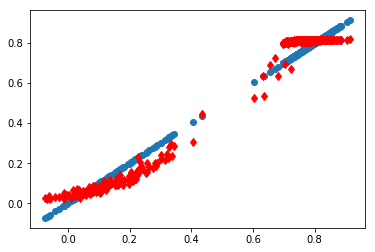

In [20]:
plt.plot(y_pred_svr,y_pred_svr,'o',y_pred_svr,y_train,'rd')
plt.show()

In [103]:
k=svr2.predict(X_test)

ValueError: X.shape[1] = 25 should be equal to 4, the number of features at training time

In [268]:
#gd_sr_svr.cv_results_